# Q1: BRF





In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:

from google.colab import drive
drive.mount ('/content/drive')

from IPython.display import Image


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


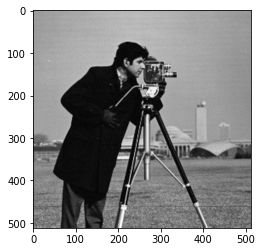

In [ ]:
img = cv2.imread('/content/drive/MyDrive/IMP301/PT2/data/cameraman.jpg', 0)
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# Defining M,N as number of rows and columns respectively
M, N = img.shape

# Get the fourier transform of the image
F = np.fft.fft2(img)

#Shift zero to center
F = np.fft.fftshift(F)

In [ ]:
# ideal bandstop filter
def IBF(F, C0, W):
    M,N = F.shape
    H = np.zeros((M, N), dtype=np.complex128)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            if D <= C0 - W/2 or D >= C0 + W/2:
                H[u,v] = 1
            else:
                H[u,v] = 0
    return H


In [ ]:
# butterworth bandstop filter
def BBF(F, C0, W, n):
    M,N = F.shape
    H = np.zeros((M, N), dtype=np.complex128)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u,v] = 1/(1 + ((D*W)/(D**2 - C0**2))**(2*n))
    return H

In [ ]:
# gaussian bandstop filter
def GBF(F, C0, W):
    M,N = F.shape
    H = np.zeros((M, N), dtype=np.complex128)
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
            H[u,v] = 1 - np.exp(-1/2*((D**2 - C0**2)/(D*W))**2)
    return H

In [ ]:
# Defining the parameters
C0 = 35/2
W = 8 #8
n = 1 # For butterworth filter only

# Apply the filters
H_IBF = IBF(F, C0, W)
H_BBF = BBF(F, C0, W, n)
H_GBF = GBF(F, C0, W)

<ipython-input-126-7198c1c29c9e>:8: RuntimeWarning: divide by zero encountered in double_scalars
  H[u,v] = 1 - np.exp(-1/2*((D**2 - C0**2)/(D*W))**2)


In [ ]:
# Transforming
G_IBF = H_IBF*F
G_BBF = H_BBF*F
G_GBF = H_GBF*F
# Spectrum
ori  = 20*np.log(np.abs(F))
S_IBF = 20*np.log(np.abs(G_IBF))
S_BBF = 20*np.log(np.abs(G_BBF))
S_GBF = 20*np.log(np.abs(G_GBF))
# Unshift 
I_IBF = np.fft.ifftshift(G_IBF)
I_BBF = np.fft.ifftshift(G_BBF)
I_GBF = np.fft.ifftshift(G_GBF)

# Inverse Fourier Transform
g_IBF = np.fft.ifft2(I_IBF)
g_BBF = np.fft.ifft2(I_BBF)
g_GBF = np.fft.ifft2(I_GBF)

<ipython-input-128-39e510298d69>:7: RuntimeWarning: divide by zero encountered in log
  S_IBF = 20*np.log(np.abs(G_IBF))


In [ ]:
ori = np.uint32(np.abs(ori))
S_IBF = np.uint32(np.abs(S_IBF))
S_BBF = np.uint32(np.abs(S_BBF))
S_GBF = np.uint32(np.abs(S_GBF))

I_IBF = np.uint32(np.abs(g_IBF))
I_BBF = np.uint32(np.abs(g_BBF))
I_GBF = np.uint32(np.abs(g_GBF))

In [ ]:
img_arr = [img, I_IBF, I_BBF, I_GBF, ori, S_IBF, S_BBF, S_GBF]
name_arr = ['Original', 'IBF', 'BBF', 'GBF','Spectrum_ori', 'Spectrum_IBF', 'Spectrum_BBF', 'Spectrum_GBF']

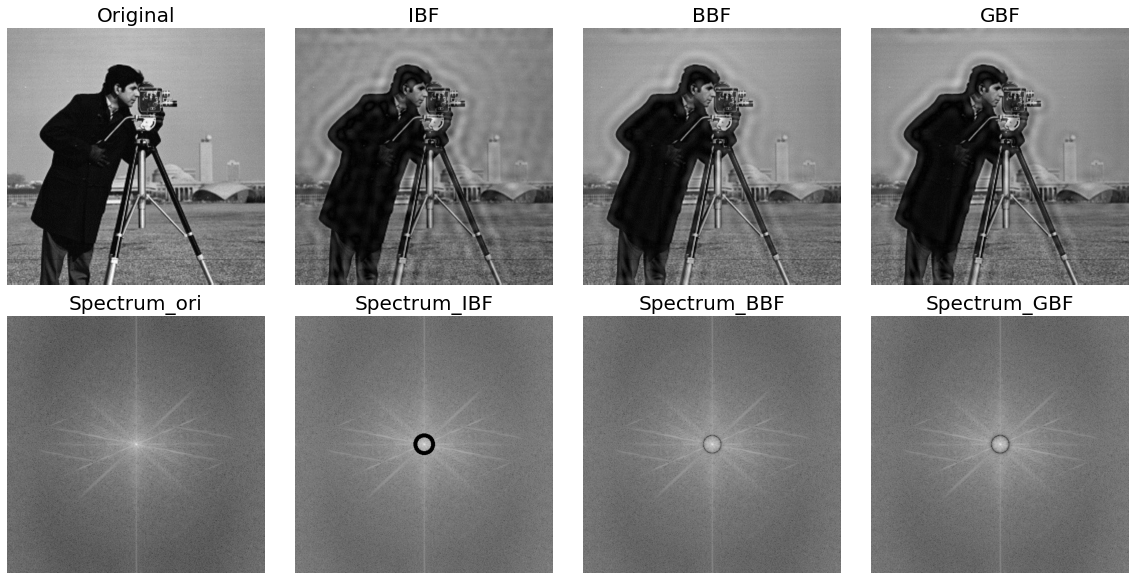

In [ ]:
cols,rows = 4,2
fig,axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*4,rows*4))
#tight fig
fig.tight_layout(pad=0)
#black background
# fig.patch.set_facecolor('black')
i = 0
j = 0
x = 0
while( x < 8):
  if j == 1:
    for i in range(0,4):
      axes[j][i].set_title(name_arr[x],fontsize=20,color='black')
      axes[j][i].imshow(img_arr[x],cmap='gray')
      axes[j][i].axis('off')
      x+=1
    break
  elif j == 0 :
      for i in range(0,4):
        axes[j][i].set_title(name_arr[x],fontsize=20,color='black')
        axes[j][i].imshow(img_arr[x],cmap='gray')
        axes[j][i].axis('off')
        x += 1
      j +=1

plt.show()

#Q2:HPF


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

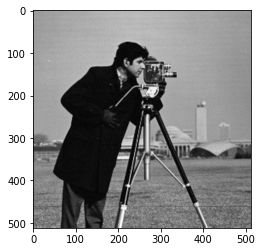

In [ ]:
# Load an image
img = cv2.imread('/content/drive/MyDrive/IMP301/PT2/data/cameraman.jpg', 0)
plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
# Defining M,N as number of rows and columns respectively
M, N = img.shape

# Get the fourier transform of the image
F = np.fft.fft2(img)

#Shift zero to center
F = np.fft.fftshift(F)

In [ ]:
# Ideal High Pass Filter
def IHPF(F, D0):
    M,N = F.shape
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            if D > D0:
                H[u, v] = 1
            else:
                H[u, v] = 0
    G = F * H
    return G

In [ ]:
# Butterworth High Pass Filter
def BHPF(F,D0):
    M,N = F.shape
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            H[u, v] = 1/(1+(D0/D)**2)
    G = F * H
    return G

In [ ]:
# Gaussian High Pass Filter
def GHPF(F,D0):
    M,N = F.shape
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            H[u, v] = 1 - np.exp(-((D/D0)**2))
    G = F * H
    return G

In [ ]:
# Define the Cut-off frequency
D0 = 80 #30
# Apply the filters
G_IHPF = IHPF(F, D0)
G_BHPF = BHPF(F, D0)
G_GHPF = GHPF(F, D0)

<ipython-input-136-58b77b5a998c>:8: RuntimeWarning: divide by zero encountered in double_scalars
  H[u, v] = 1/(1+(D0/D)**2)


In [ ]:
# Get the inverse fourier transform of the filters
G_IHPF = np.fft.ifft2(np.fft.ifftshift(G_IHPF))
G_BHPF = np.fft.ifft2(np.fft.ifftshift(G_BHPF))
G_GHPF = np.fft.ifft2(np.fft.ifftshift(G_GHPF))

In [ ]:
# Get the abs value and typecast to uint8
img_IHPF = np.abs(G_IHPF).astype(np.uint8)
img_BHPF = np.abs(G_BHPF).astype(np.uint8)
img_GHPF = np.abs(G_GHPF).astype(np.uint8)

In [ ]:
img_arr = [img, img_IHPF, img_BHPF, img_GHPF]
name_arr = ['Original', 'Ideal High Pass Filter', 'Butterworth High Pass Filter', 'Gaussian High Pass Filter']

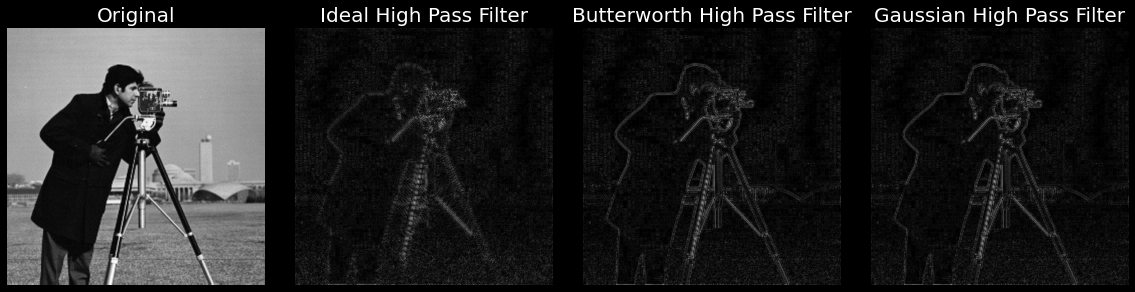

In [ ]:
cols,rows = 4,1
fig,axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*4,rows*4))
#tight fig
fig.tight_layout(pad=0)
#black background
fig.patch.set_facecolor('black')
for j in range(cols):
    axes[j].set_title(name_arr[j],fontsize=20,color='white')
    axes[j].imshow(img_arr[j],cmap='gray')
    axes[j].axis('off')
plt.show()

# Q3: LPF

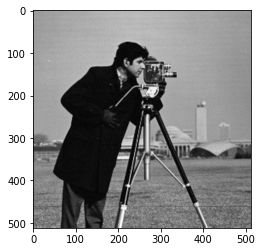

In [ ]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load an image
img = cv2.imread('/content/drive/MyDrive/IMP301/PT2/data/cameraman.jpg', 0)
plt.imshow(img, cmap='gray')
plt.show()

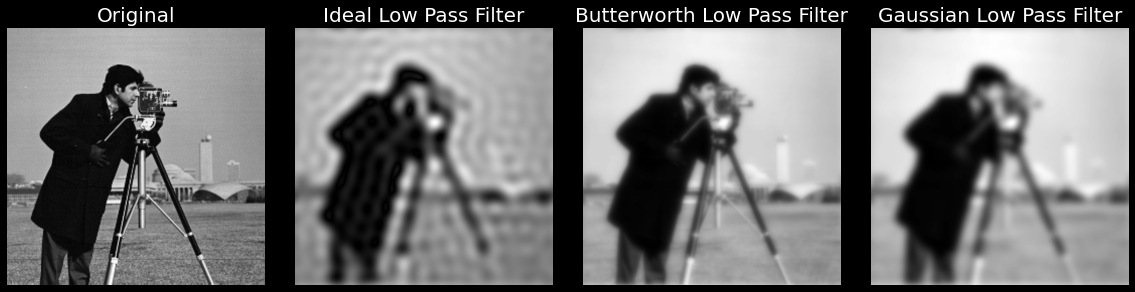

In [ ]:
# Defining M,N as number of rows and columns respectively
M, N = img.shape

# Get the fourier transform of the image
F = np.fft.fft2(img)

#Shift zero to center
F = np.fft.fftshift(F)
# Ideal Low Pass Filter
def ILPF(F, D0):
    M,N = F.shape
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            if D <= D0:
                H[u, v] = 1
            else:
                H[u, v] = 0
    G = F * H
    return G
# Butterworth Low Pass Filter
def BLPF(F,D0):
    M,N = F.shape
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            H[u, v] = 1/(1+(D/D0)**2)
    G = F * H
    return G
# Gaussian Low Pass Filter
def GLPF(F,D0):
    M,N = F.shape
    H = np.zeros((M, N))
    for u in range(M):
        for v in range(N):
            D = np.sqrt((u - M / 2) ** 2 + (v - N / 2) ** 2)
            H[u, v] = np.exp(-((D/D0)**2))
    G = F * H
    return G
# Define the Cut-off frequency
D0 = 15
# Apply the filters
G_ILPF = ILPF(F, D0)
G_BLPF = BLPF(F, D0)
G_GLPF = GLPF(F, D0)
# Get the inverse fourier transform of the filters
G_ILPF = np.fft.ifft2(np.fft.ifftshift(G_ILPF))
G_BLPF = np.fft.ifft2(np.fft.ifftshift(G_BLPF))
G_GLPF = np.fft.ifft2(np.fft.ifftshift(G_GLPF))
# Get the abs value and typecast to uint8
img_ILPF = np.abs(G_ILPF).astype(np.uint8)
img_BLPF = np.abs(G_BLPF).astype(np.uint8)
img_GLPF = np.abs(G_GLPF).astype(np.uint8)
img_arr = [img, img_ILPF, img_BLPF, img_GLPF]
name_arr = ['Original', 'Ideal Low Pass Filter', 'Butterworth Low Pass Filter', 'Gaussian Low Pass Filter']
cols,rows = 4,1
fig,axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols*4,rows*4))
#tight fig
fig.tight_layout(pad=0)
#black background
fig.patch.set_facecolor('black')
for j in range(cols):
    axes[j].set_title(name_arr[j],fontsize=20,color='white')
    axes[j].imshow(img_arr[j],cmap='gray')
    axes[j].axis('off')
plt.show()